In [1]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from data_utils import *
DATA_DIR = os.path.join(os.getcwd(), "IFS", "01-20-2025")

Observations (KIS = klimatologisch informaties systeem)
- https://dataplatform.knmi.nl/dataset/vochtigheid-en-temperatuur-1-0

In [2]:
obs = load_observations(DATA_DIR, "kis_tot_202301.gz")
obs_plot = obs[obs["LOCATION"] == obs["LOCATION"].unique()[2]]

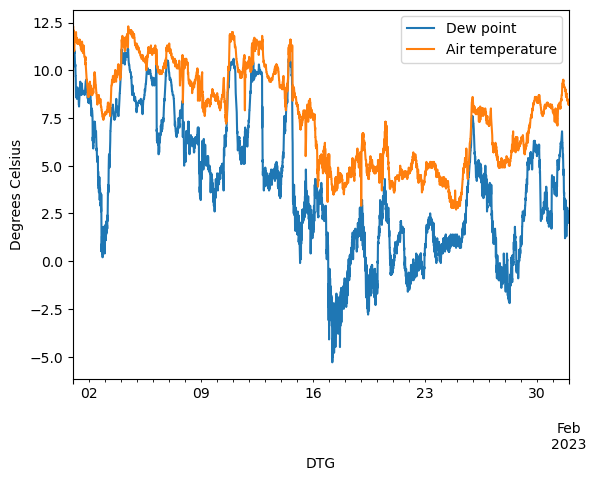

In [3]:
ax = plt.gca()
obs_plot.plot(x = "DTG", y = "T_DEWP_10", ylabel = "Degrees Celsius", label = "Dew point", ax = ax)
obs_plot.plot(x = "DTG", y = "T_DRYB_10", ylabel = "Degrees Celsius", label = "Air temperature", ax = ax)
ax.legend()

ECMWF Data ([2t](https://codes.ecmwf.int/grib/param-db/167) = 2 metre temperature, [2d](https://codes.ecmwf.int/grib/param-db/168) = 2 metre dewpoint temperature)

In [4]:
ds_2t = load_dataset(DATA_DIR, "combined_raw_2t_2023.nc")
ds_2d = load_dataset(DATA_DIR, "combined_raw_2d_2023.nc")

Plot ECMWF members at one location

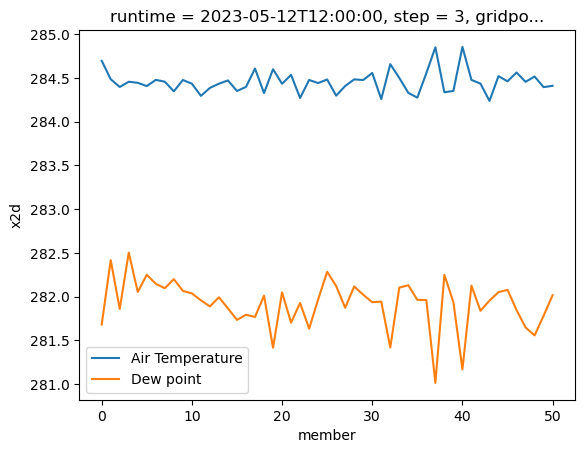

In [5]:
ds_2t.sel(step = 3, gridpoint = 605, runtime = "2023-05-12T12")["x2t"].plot(label = "Air Temperature")
ds_2d.sel(step = 3, gridpoint = 605, runtime = "2023-05-12T12")["x2d"].plot(label = "Dew point")
plt.gca().legend()

Plot values over time

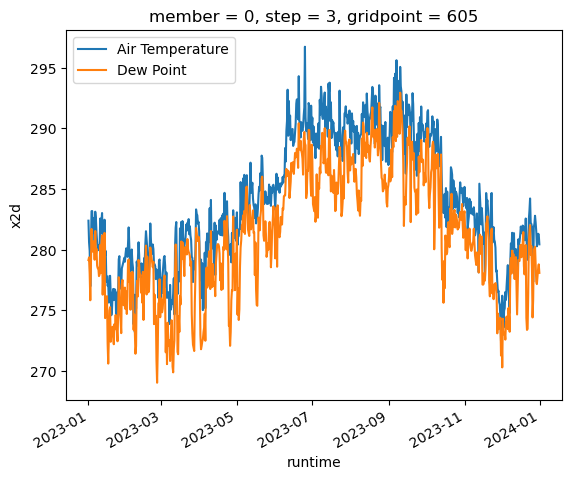

In [6]:
ds_2t.sel(step = 3, gridpoint = 605, member = 0)["x2t"].sortby('runtime').plot(label = "Air Temperature")
ds_2d.sel(step = 3, gridpoint = 605, member = 0)["x2d"].sortby('runtime').plot(label = "Dew Point")
plt.gca().legend()

Station information
- https://www.knmi.nl/kennis-en-datacentrum/uitleg/automatische-weerstations
- https://cdn.knmi.nl/system/downloads/files/000/000/060/original/Kaart_AWS_NL_land_zee_incl_border_20230609_KNMI.png

In [7]:
sta_df = pd.read_csv(os.path.join(DATA_DIR, "sta_gp_metadata.csv"))
gp_df = pd.read_csv(os.path.join(DATA_DIR, "prediction_meta.csv"))

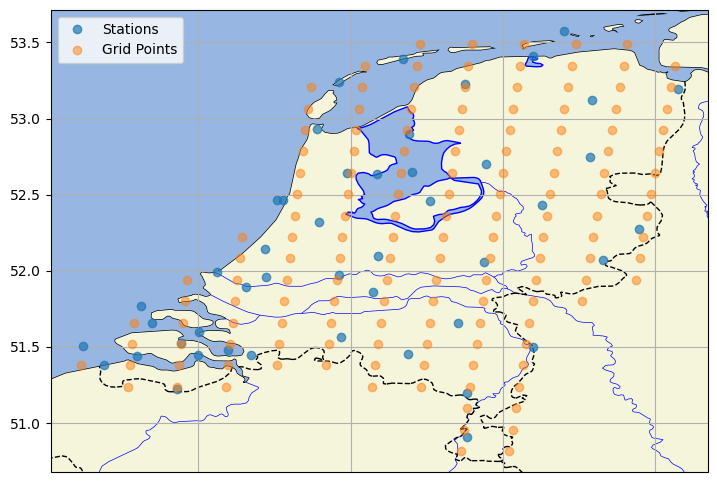

In [8]:
ax = get_cartopy_ax()

sta_df.plot(x = "sta_lon", y = "sta_lat", style = "o", ax = ax, label = "Stations", alpha = 0.7)
gp_df.plot(x = "gp_lon", y = "gp_lat", style = "o", ax = ax, label = "Grid Points", alpha = 0.5)

plt.show()